In [77]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
!pip install python-dotenv


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Exploration

In [62]:
def load_data():
    load_dotenv()

    url = os.getenv("GOOGLE_SHEET_URL")
    df = pd.read_csv(url)
    return df



In [63]:
df = load_data()

df.head()

,Scam,Message
0,1,"Hey guys, I'm looking to sell my full season ..."
1,1,@everyone Just upgraded! Giving away my old Ca...
2,0,Hi everyone!!! So sorry for late notice but to...
3,1,"Hey guys, I’m looking to sell my full season t..."
4,0,god bless the admin


In [64]:
df['Scam'].value_counts()

Scam
1    97
0    96
Name: count, dtype: int64

In [65]:
group_df = df.groupby('Scam')['Message']

In [66]:
group_df.first()

Scam
0    Hi everyone!!! So sorry for late notice but to...
1    Hey guys, I'm looking to sell  my full season ...
Name: Message, dtype: object

In [67]:
df.isna().sum()

Scam       0
Message    0
dtype: int64

In [68]:
df = df.drop_duplicates()

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


# Machine Learning and Feature Engineering

In [70]:
X = df['Message']
y = df['Scam']

In [94]:
def predict_message(vectorizer, X_train, X_test, y_train, y_test):

    # Fit vectorizer
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Train logistic regression
    model = LogisticRegression()
    model.fit(X_train_vec, y_train)

    # Predictions
    y_pred = model.predict(X_test_vec)
    y_probs = model.predict_proba(X_test_vec)[:, 1]


    return model, y_pred, y_probs

   

    

In [95]:
def model_evaluation(y_test, y_pred):
     # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")

    cm = confusion_matrix(y_test, y_pred)


    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Not Spam (0)', 'Spam (1)'],
            yticklabels=['Not Spam (0)', 'Spam (1)'])

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


In [72]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




In [73]:
vectorizer= TfidfVectorizer(stop_words='english')

In [96]:
# make predictions
lr_base, pred_baselr, prob_baselr = predict_message(vectorizer, X_train, X_test, y_train, y_test)


Accuracy:  0.7692
Precision: 0.6000
Recall:    0.9231


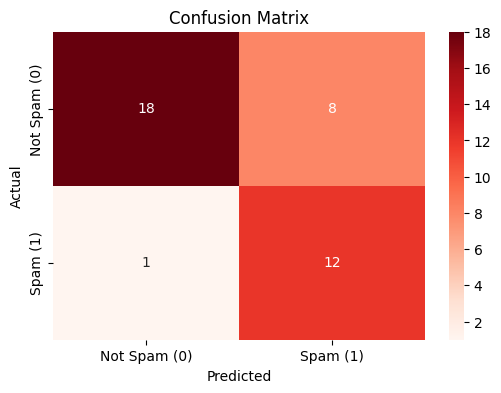

In [90]:
# evaluation model
model_evaluation(y_test, pred_baselr)

In [98]:
results = pd.DataFrame({
    "Message": X_test,
    "Actual": y_test,
    "Predicted": pred_baselr,
    "Spam_Prob": prob_baselr
})

results.head()


,Message,Actual,Predicted,Spam_Prob
45,"Giving away Billie Eilish tickets for free, lm...",1,1,0.757351
136,Have we done a hackathon before?,0,0,0.482921
76,Are there going to be more J'ouvert tickets av...,0,0,0.442166
143,i made extra banana bread and don’t trust myse...,0,0,0.401578
113,I have leftover tablets from a cancelled order...,1,1,0.578140


In [92]:
print(len(X_test))
print(len(y_test))
print(len(pred_baselr))
print(len(prob_baselr))


39
39
39
39
